In [ ]:
# Import necessary libaries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Show all columns and rows
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [ ]:
# Import dataset
train_df = pd.read_csv(r"https://drive.google.com/uc?export=download&id=10yGQA4AgDmZNnOr6vwvM0Kre31Tge9sP")
test_df = pd.read_csv(r"https://drive.google.com/uc?export=download&id=1ZYeEZLzDjl9xK-EiXanG5yCmeVnKW2v9")


In [ ]:
# make y train 
y_train_data = train_df.iloc[:, -1]
# drop dependend feature from train dataset
train_df = train_df.drop(['SalePrice', 'Id'], axis=1) # Here is the "Id" column is not necessary, so we can drop it from dataset.
train_df.shape

(1460, 79)

In [ ]:
# let's concatanet train & test dataset
data = pd.concat((train_df, test_df), axis=0)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Id
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,NaN
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,NaN
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,NaN
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,NaN
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,NaN


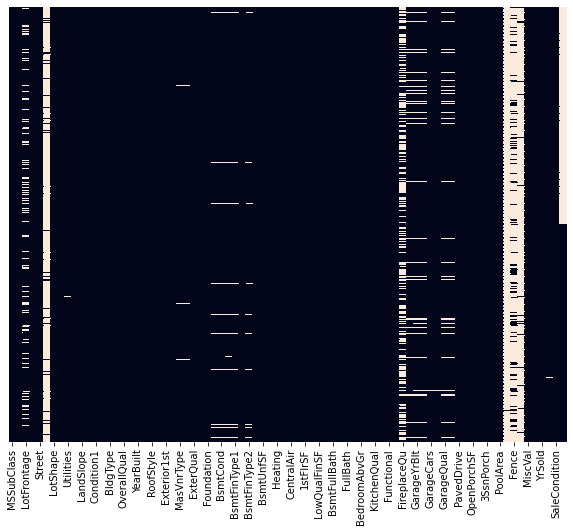

In [ ]:
# Show heat map to see the condition of missing values of features
plt.figure(figsize=(10,8))
sns.heatmap(data.isnull(),yticklabels=False, cbar=False)

In [ ]:
# Let's see the percentage of missing value
data.isnull().mean()

MSSubClass       0.000000
MSZoning         0.001370
LotFrontage      0.166495
LotArea          0.000000
Street           0.000000
Alley            0.932169
LotShape         0.000000
LandContour      0.000000
Utilities        0.000685
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000343
Exterior2nd      0.000343
MasVnrType       0.008222
MasVnrArea       0.007879
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.027749
BsmtCond         0.028092
BsmtExposure     0.028092
BsmtFinType1     0.027064
BsmtFinSF1       0.000343
BsmtFinType2     0.027407
BsmtFinSF2       0.000343
BsmtUnfSF        0.000343
TotalBsmtSF      0.000343
Heating     

In [ ]:
# Find 45% or above missing value features 
dropable_features = data.isnull().mean()[data.isnull().mean() >0.45].keys()
dropable_features

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'Id'], dtype='object')

In [ ]:
# Let's drop the maximum missing value features 
data = data.drop(columns=dropable_features)
data.shape

(2919, 74)

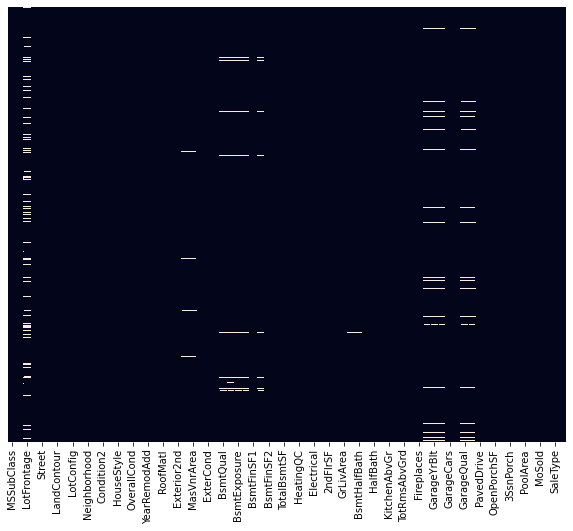

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False)

In [ ]:
### Let's find categorical and numarical features of Missing value
  # Categorical Features
categorical_features_nan = [c_feature for c_feature in data.columns if data[c_feature].isnull().sum()>1 and data[c_feature].dtypes =='O']
  # Numarical Features
numarical_features_nan = [n_feature for n_feature in data.columns if data[n_feature].isnull().sum()>1 and data[n_feature].dtypes != 'O']
# Let's show the percentage of missing or NAN values
def nan_percentage(feature_nan):
  for feature in feature_nan:
    print("{}: {}%".format(feature, np.round(data[feature].isnull().mean(), 5)))

**Let's Handling Missing Values of Categorical Features**

In [ ]:
# categorical features missing value percentage
nan_percentage(categorical_features_nan)

MSZoning: 0.00137%
Utilities: 0.00069%
MasVnrType: 0.00822%
BsmtQual: 0.02775%
BsmtCond: 0.02809%
BsmtExposure: 0.02809%
BsmtFinType1: 0.02706%
BsmtFinType2: 0.02741%
Functional: 0.00069%
GarageType: 0.05379%
GarageFinish: 0.05447%
GarageQual: 0.05447%
GarageCond: 0.05447%


In [ ]:
# Let's handle missing value with the mode of feature value
for feature in categorical_features_nan:
  data[feature] = data[feature].fillna(data[feature].mode()[0])

In [ ]:
nan_percentage(categorical_features_nan)

MSZoning: 0.0%
Utilities: 0.0%
MasVnrType: 0.0%
BsmtQual: 0.0%
BsmtCond: 0.0%
BsmtExposure: 0.0%
BsmtFinType1: 0.0%
BsmtFinType2: 0.0%
Functional: 0.0%
GarageType: 0.0%
GarageFinish: 0.0%
GarageQual: 0.0%
GarageCond: 0.0%


**Let's Handling Missing value of Numarical Features**

In [ ]:
# numarical features missing value percentage
nan_percentage(numarical_features_nan)

LotFrontage: 0.1665%
MasVnrArea: 0.00788%
BsmtFullBath: 0.00069%
BsmtHalfBath: 0.00069%
GarageYrBlt: 0.05447%


In [ ]:
for feature in numarical_features_nan:
  data[feature] = data[feature].fillna(data[feature].mean())

In [ ]:
nan_percentage(numarical_features_nan)

LotFrontage: 0.0%
MasVnrArea: 0.0%
BsmtFullBath: 0.0%
BsmtHalfBath: 0.0%
GarageYrBlt: 0.0%


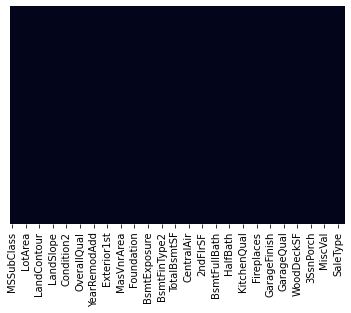

In [ ]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False)

**Let's Handle Categorical Features**

In [ ]:
# Find all Categorical Features 
Categorical_Features  = [feature for feature in data.columns if data[feature].dtypes == "O"]
len(Categorical_Features)

38

In [ ]:
### Use Onehot encode to handle categorical features 
  # This a function for handling all categorcial features
def Categorical_onehot_encode(multicolumn):
  df_final = data
  i = 0
  for fields in multicolumn:
    print(fields)
    data1 = pd.get_dummies(data[fields], drop_first=True)

    data.drop([fields], axis=1, inplace=True)
    if i==0:
      df_final = data1.copy()
    else:
      df_final = pd.concat([df_final,data1], axis=1)
    i=i+1
  df_final = pd.concat([data, df_final], axis=1)
  return df_final


In [ ]:
main_data = data.copy()

In [ ]:
# Calling Function here 
final_data = Categorical_onehot_encode(Categorical_Features)

In [ ]:
final_data.shape

(2919, 232)

In [ ]:
final_data = final_data.loc[:, ~final_data.columns.duplicated()]

In [ ]:
final_data.shape

(2919, 176)

In [ ]:
data_corr = final_data.corr()

In [ ]:
column = np.full((data_corr.shape[0],), True, dtype=bool)

for i in range(data_corr.shape[0]):
  for k in range(i+1, data_corr.shape[0]):
    if data_corr.iloc[i, k] >= 0.9:
      if column[k]:
        column[k] = False

In [ ]:
selected_columns = final_data.columns[column]
data = final_data[selected_columns]

In [ ]:
# Let's see what is our y train dataset shape so that we can reshape our final_data in train & test data.
y_train_data.shape

(1460,)

In [ ]:
# Now divided final dataset between train & test data ( 1460+1459 = 2919)
X_train_data = data.iloc[:1460, :]
X_test_data = data.iloc[:1459, :]

In [ ]:
X_train_data.shape

(1460, 174)

In [ ]:
# # Root-Mean-Squared-Error
# from sklearn.metrics import mean_squared_error
# def RMSE(y_test, y_predict):
#   return np.sqrt(mean_squared_error(y_test, y_predict))

**Create model by using XGBoost Regressor**
**and Hyperparameter optimization**





In [ ]:
## Hyper Parameter tuning 
n_estimators = [100, 500, 900, 1200, 1500]
max_depth = [2, 3, 5, 10, 15]
booster = ["gbtree", "gblinear"]
base_score = [0.25, 0.5, 0.75, 1]
learning_rate= [0.1, 0.15, 0.20, 0.25]
min_child_weight = [1, 2, 3, 4, 5]

## Define Hyperparameter grid
hyperparameter_grid = {
  "n_estimators" : n_estimators,
  "max_depth" : max_depth,
  "booster" : booster,
  "base_score" : base_score,
  "learning_rate" : learning_rate,
  "min_child_weight" : min_child_weight
}

In [ ]:
# Use Random Search CV with 4-fold Corss Validation
randomCV = RandomizedSearchCV(
    estimator = regressor_,
    param_distributions = hyperparameter_grid,
    n_iter = 50, 
    cv = 5,
    n_jobs = 4,
    verbose = 5,
    scoring = 'neg_mean_absolute_error',
    return_train_score = True,
    random_state = 42
)

In [ ]:
randomCV.fit(X_train_data, y_train_data)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   46.7s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  3.1min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 10.9min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 21.1min finished


[14:59:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                   iid='deprecated', n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['g

In [ ]:
randomCV.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=2, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
# Call XGBoost function
house_price_model = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=2, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
house_price_model.fit(X_train_data, y_train_data)

[15:07:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=2, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
y_prediction = house_price_model.predict(X_test_data)

In [ ]:
y_prediction

array([204136.83, 174887.28, 209377.9 , ..., 198802.4 , 269106.47,
       140245.36], dtype=float32)

In [ ]:
house_price_model.score(X_train_data, y_train_data)

0.9737740041130286

In [ ]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(house_price_model, X_train_data, y_train_data.ravel(), cv=10)
score

[15:15:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:15:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:15:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:15:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:15:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:15:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:15:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:15:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

array([0.89486115, 0.92626625, 0.92290632, 0.83605709, 0.90909524,
       0.91339643, 0.84411375, 0.91421922, 0.8804913 , 0.89279778])

In [ ]:
score.mean()

0.8702396106971906

In [ ]:
# # Let's Finalized our model
# import pickle
# FileName = "House_Price_Model.pkl"
# pickle.dump(house_price_model, open(FileName, "wb"))

In [ ]:
# Let's create sampel file
pred = pd.DataFrame(y_prediction)
sub_file = pd.read_csv(r"https://drive.google.com/uc?export=download&id=14cvC-wIsULmmncTbF2gEop8Xjczz-Dzv")
predict_submission = pd.concat([sub_file['Id'], pred], axis=1)
predict_submission.columns = ['Id', 'SalePrice']
# predict_submission.to_csv('sample_submission_3rd.csv', index=False)

**Create model by using RandomForest Regressor**

In [ ]:
# Let's create a model with Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
price_predict_rf = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=0.1, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=1, warm_start=False)
price_predict_rf.fit(X_train_data, y_train_data)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    4.2s finished


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=0.1, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=1, warm_start=False)

In [ ]:
# Let's test our model with test data
rfr_model_test = price_predict_rf.predict(X_test_data)
rfr_model_test

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


array([194883.77037698, 155266.74098481, 201514.34292527, ...,
       188025.17698153, 246252.99556734, 135903.00534612])

In [ ]:
price_predict_rf.score(X_train_data, y_train_data)

0.9814904010873218

In [ ]:
# # Let's Finalized our model
# import pickle
# FileName = "House_Price(RFR).pkl"
# pickle.dump(price_predict_rf, open(FileName, "wb"))

In [ ]:
# Let's create sampel file
pred = pd.DataFrame(rfr_model_test)
sub_file = pd.read_csv(r"https://drive.google.com/uc?export=download&id=14cvC-wIsULmmncTbF2gEop8Xjczz-Dzv")
predict_submission = pd.concat([sub_file['Id'], pred], axis=1)
predict_submission.columns = ['Id', 'SalePrice']
predict_submission.to_csv('sample_submission().csv', index=False)